In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [39]:
df = pd.read_csv('cleaned_dataset2.csv')
df.head()

,Course,Daytime evening attendance,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem enrolled,Curricular units 1st sem approved,Curricular units 1st sem grade,Curricular units 2nd sem enrolled,Curricular units 2nd sem approved,Curricular units 2nd sem grade,Target
0,2,1,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000,0
1,11,1,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667,2
2,5,1,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000,0
3,15,1,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000,2
4,3,0,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000,2


In [40]:

X = df.drop('Target',axis = 1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, 
                                                    random_state=32)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [51]:
lr = LogisticRegression(max_iter=4000) 

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.7677419354838709
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       299
           1       0.49      0.30      0.38       161
           2       0.79      0.94      0.86       470

    accuracy                           0.77       930
   macro avg       0.70      0.66      0.67       930
weighted avg       0.75      0.77      0.75       930



# KNN

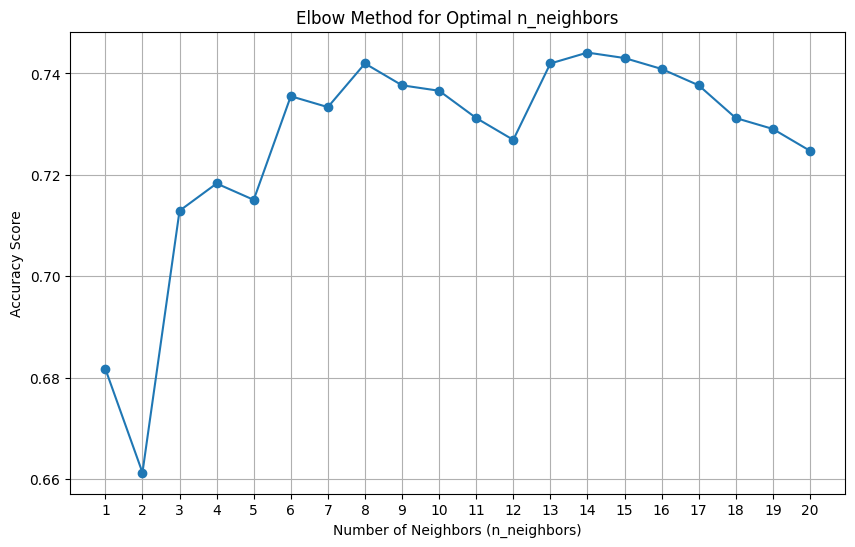

In [59]:
neighbors = range(1, 21)
accuracy_scores = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy Score')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

In [60]:
knn = KNeighborsClassifier(n_neighbors=14) 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.7440860215053764
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       299
           1       0.44      0.32      0.37       161
           2       0.77      0.92      0.84       470

    accuracy                           0.74       930
   macro avg       0.68      0.64      0.65       930
weighted avg       0.73      0.74      0.73       930



# Visuals

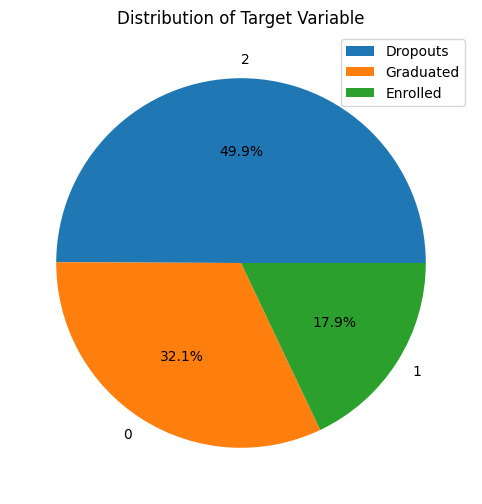

In [43]:
target_labels = {0: 'Dropouts', 1: 'Enrolled', 2: 'Graduated'}

plt.figure(figsize=(8, 6))
df['Target'].value_counts().plot(kind='pie',autopct='%1.1f%%')


plt.title('Distribution of Target Variable')
plt.ylabel('')

plt.legend(labels=[target_labels.get(item, item) for item in df['Target'].unique()])

plt.show()

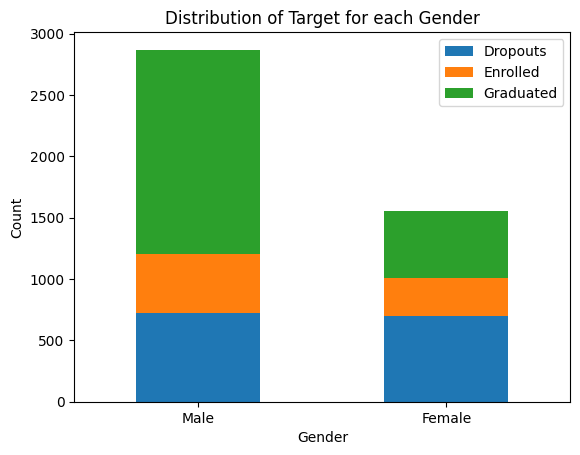

In [44]:
target_labels = {0: 'Dropouts', 1: 'Enrolled', 2: 'Graduated'}

grouped = df.groupby(['Gender', 'Target']).size().unstack()

gender_labels = {0: 'Male', 1: 'Female'}
grouped.rename(index=gender_labels, inplace=True)

grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Target for each Gender')
plt.legend(labels=[target_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

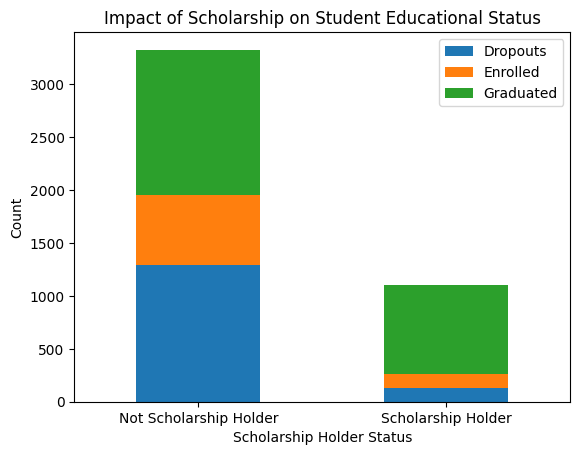

In [45]:
scholarship_labels = {0: 'Not Scholarship Holder', 1: 'Scholarship Holder'}

grouped_scholarship = df.groupby(['Scholarship holder', 'Target']).size().unstack()
grouped_scholarship.rename(index=scholarship_labels, inplace=True)
grouped_scholarship_plot = grouped_scholarship.plot(kind='bar', stacked=True)

plt.xlabel('Scholarship Holder Status')
plt.ylabel('Count')
plt.title('Impact of Scholarship on Student Educational Status')
plt.legend(labels=[target_labels.get(item, item) for item in grouped_scholarship.columns])
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

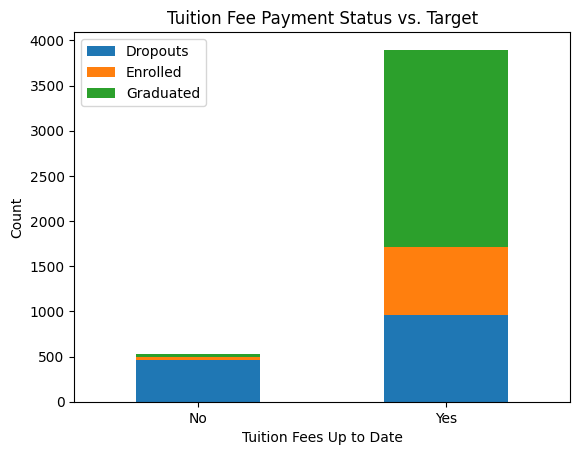

In [46]:
target_labels = {0: 'Dropouts', 1: 'Enrolled', 2: 'Graduated'}
tuition_labels = {0: 'No', 1: 'Yes'}

grouped_tuition = df.groupby(['Tuition fees up to date', 'Target']).size().unstack()
grouped_tuition.rename(index=tuition_labels, inplace=True)

plt.figure(figsize=(8, 6))
grouped_tuition.plot(kind='bar', stacked=True)

plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Count')
plt.title('Tuition Fee Payment Status vs. Target')
plt.legend(labels=[target_labels.get(item, item) for item in grouped_tuition.columns])
plt.xticks(rotation=0)
plt.show()

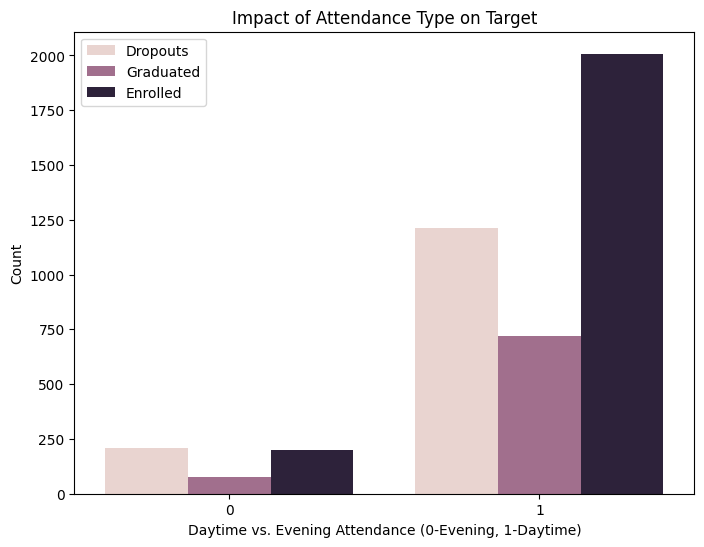

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Daytime evening attendance', hue='Target', data=df)
plt.xlabel('Daytime vs. Evening Attendance (0-Evening, 1-Daytime)')
plt.ylabel('Count')
plt.title('Impact of Attendance Type on Target')
plt.legend(labels=[target_labels.get(item, item) for item in df['Target'].unique()])
plt.show()

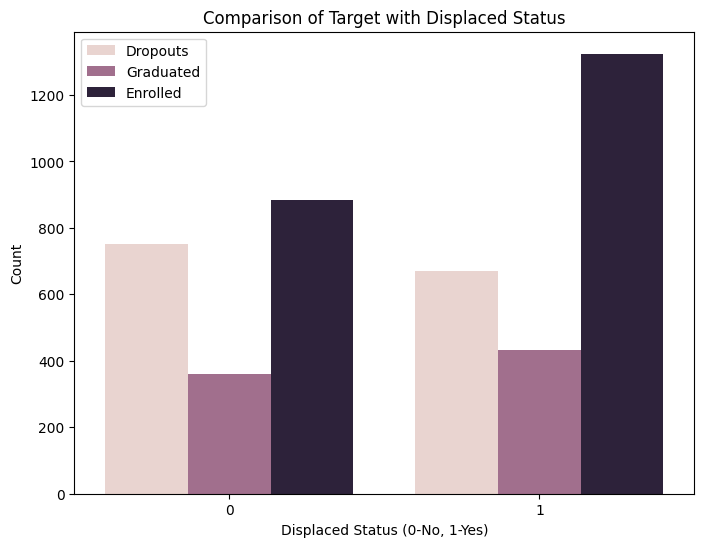

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Displaced', hue='Target', data=df)
plt.xlabel('Displaced Status (0-No, 1-Yes)')
plt.ylabel('Count')
plt.title('Comparison of Target with Displaced Status')
plt.legend(labels=[target_labels.get(item, item) for item in df['Target'].unique()])
plt.show()